# Kaggle linking

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload() # Upload your kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smagni","key":"eb7eafd59b1120195c28192cf629a2c9"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to download the data from kaggle
!kaggle datasets download -d oddrationale/mnist-in-csv

 59% 9.00M/15.2M [00:00<00:00, 24.1MB/s]
100% 15.2M/15.2M [00:00<00:00, 31.0MB/s]


In [ ]:
# to unzip the downloaded data
!unzip '/content/mnist-in-csv.zip'

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


# Start

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [ ]:
train = pd.read_csv('/content/mnist_train.csv')

In [ ]:
train.shape

(60000, 785)

In [ ]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.iloc[:10000, 1:].values
y = train.iloc[:10000, 0].values

In [ ]:
X.shape, y.shape

((10000, 784), (10000,))

In [ ]:
def plot_digit(x):
    img = x.reshape(28, 28) # array --> img
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.show()

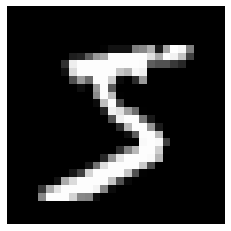

In [ ]:
plot_digit(X[0])

In [ ]:
y[0]

5

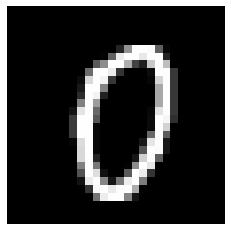

In [ ]:
plot_digit(X[1000])

In [ ]:
y[1000]

0

In [ ]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def KNN(X, y, testing_point, k = 7):
    # step 1
    dist_target = []
    for i in range(X.shape[0]):
        dist = distance(testing_point, X[i])
        target = y[i]
        dist_target.append([dist, target])
    
    # step 2
    dist_target = sorted(dist_target)

    # step 3
    k_dist_target = dist_target[:k]
    k_dist_target = np.array(k_dist_target)

    # step 4
    target_count = np.unique(k_dist_target[:, 1], return_counts= True)
    idx_max_count = np.argmax(target_count[1])

    # step 5
    prediction = target_count[0][idx_max_count]

    return prediction

In [ ]:
test = pd.read_csv('/content/mnist_test.csv')

In [ ]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(10000, 785)

In [ ]:
X_test = test.iloc[:1000, 1:].values
y_test = test.iloc[:1000, 0].values

In [ ]:
X_test.shape, y_test.shape

((1000, 784), (1000,))

In [ ]:
y_pred = []

for i in tqdm(range(X_test.shape[0])):
    pred = KNN(X, y, X_test[i], k = 9)
    y_pred.append(pred)

100%|██████████| 1000/1000 [04:26<00:00,  3.75it/s]


In [ ]:
y_pred = np.array(y_pred)

In [ ]:
((y_pred == y_test).sum())/len(y_test)

0.913

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors= 9, n_jobs= -1)

In [ ]:
clf.fit(X, y) # training process

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred1 = clf.predict(X_test)

In [ ]:
((y_pred1 == y_test).sum())/len(y_test)

0.913